# generate random 2D data points

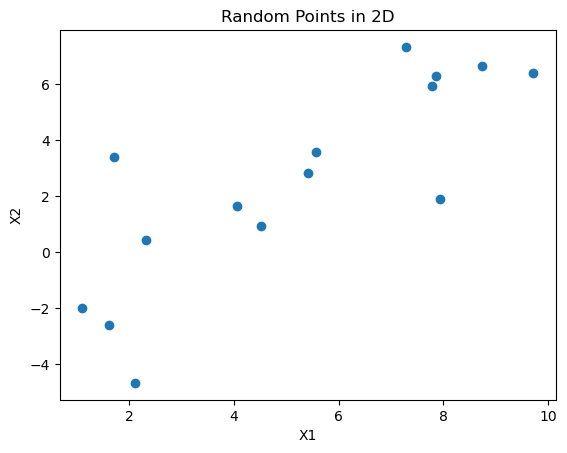

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(629)

# Cluster 1
num_points_cluster1 = 5
cluster1_x1 = np.random.randn(num_points_cluster1) * 2 + 5
cluster1_x2 = np.random.randn(num_points_cluster1) + 2

# Cluster 2
num_points_cluster2 = 5
cluster2_x1 = np.random.randn(num_points_cluster2) * 0.5 + 2
cluster2_x2 = np.random.randn(num_points_cluster2) * 3 - 1

# Cluster 3
num_points_cluster3 = 5
cluster3_x1 = np.random.randn(num_points_cluster3) * 1.5 + 8
cluster3_x2 = np.random.randn(num_points_cluster3) * 0.5 + 7

# Combine the clusters
x1 = np.concatenate((cluster1_x1, cluster2_x1, cluster3_x1))
x2 = np.concatenate((cluster1_x2, cluster2_x2, cluster3_x2))

# Plot the random points
plt.scatter(x1, x2)
plt.title("Random Points in 2D")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


# normalize the data

In [2]:
X=np.array([x1,x2]).T
X.shape

(15, 2)

In [3]:
X_norm=(X-X.mean(axis=0))/X.std(axis=0)

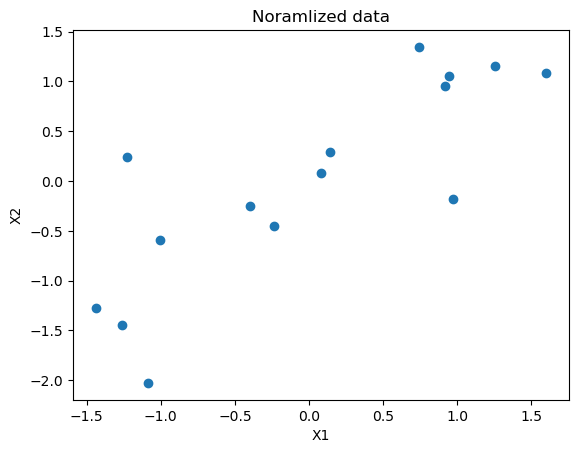

In [4]:
# Plot the random points
plt.scatter(X_norm[:,0], X_norm[:,1])
plt.title("Noramlized data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

# calculate cov matrix of the data

In [5]:
cov=np.cov(X_norm,rowvar=False)
cov

array([[1.07142857, 0.88023688],
       [0.88023688, 1.07142857]])

# calculate the eigen value and eigen vector of the cov matrix

In [6]:
eigen_vals, eigen_vecs = np.linalg.eigh(cov)
eigen_vecs
# the eigen vectors of a sqared matrix are perpendicular with each other

array([[-0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])

In [7]:
eigen_vals

array([0.19119169, 1.95166545])

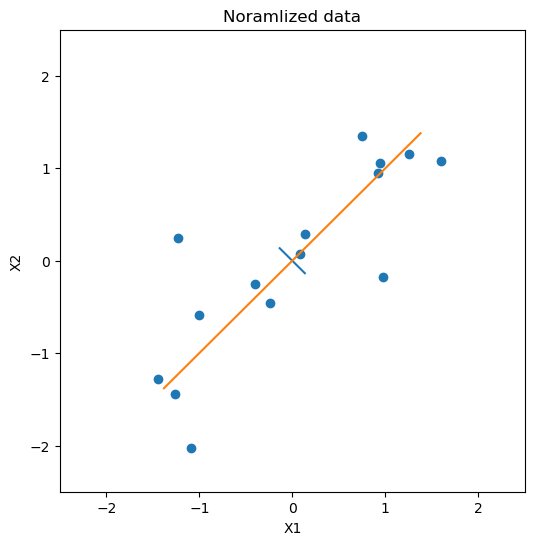

In [8]:
# Plot the random points
plt.figure(figsize=(6,6))

plt.scatter(X_norm[:,0], X_norm[:,1])

plt.plot([-eigen_vals[0]*eigen_vecs[0][0],eigen_vals[0]*eigen_vecs[0][0]],[-eigen_vals[0]*eigen_vecs[0][1],eigen_vals[0]*eigen_vecs[0][1]])
plt.plot([-eigen_vals[1]*eigen_vecs[1][1],eigen_vals[1]*eigen_vecs[1][1]],[-eigen_vals[1]*eigen_vecs[1][1],eigen_vals[1]*eigen_vecs[1][1]])


plt.title("Noramlized data")

plt.xlabel("X1")
plt.ylabel("X2")
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.show()

In [9]:
# sort eigenvalue in increasing order (get the indices from the sort)
idx_sorted = np.argsort(eigen_vals)

# reverse the order so that it's from highest to lowest.
idx_sorted_decreasing = idx_sorted[::-1]

# sort the eigen values by idx_sorted_decreasing
eigen_vals_sorted = eigen_vals[idx_sorted_decreasing]

# sort eigenvectors using the idx_sorted_decreasing indices
eigen_vecs_sorted = eigen_vecs[:,idx_sorted_decreasing]


In [10]:
# transform the data by multiplying the transpose of the eigenvectors with the transpose of the de-meaned data
# Then take the transpose of that product.
X_rotated = (eigen_vecs_sorted.T.dot(X_norm.T)).T

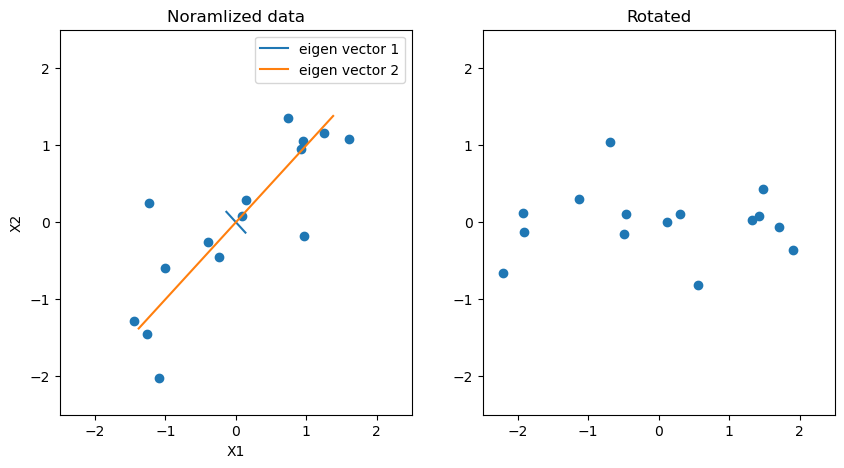

In [15]:
# Plot the random points
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X_norm[:,0], X_norm[:,1])

plt.plot([-eigen_vals[0]*eigen_vecs[0][0],eigen_vals[0]*eigen_vecs[0][0]],[-eigen_vals[0]*eigen_vecs[0][1],eigen_vals[0]*eigen_vecs[0][1]],label='eigen vector 1')
plt.plot([-eigen_vals[1]*eigen_vecs[1][1],eigen_vals[1]*eigen_vecs[1][1]],[-eigen_vals[1]*eigen_vecs[1][1],eigen_vals[1]*eigen_vecs[1][1]],label='eigen vector 2')
plt.legend()

plt.title("Noramlized data")

plt.xlabel("X1")
plt.ylabel("X2")
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)


plt.subplot(1,2,2)
plt.title('Rotated')
plt.scatter(X_rotated[:,0],X_rotated[:,1])
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)

plt.show()